In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [219]:
m=pd.read_csv("F:\\Camera Roll\\Downloads\\tips.csv")
m

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [220]:
m.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [221]:
m.shape

(244, 7)

In [222]:
m.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [223]:
m.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


__From the above description we got the measure of dispersion and measure of central tendency.
the average total_bill,tip,size given is around 20,3,2 or 3 respectively.__

In [224]:
m.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


__this will give the description of all the datatypes of the data set__

In [225]:
m.describe(include='O')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


__this will give the description of only the objects of the data set__

In [226]:
m.skew()

C:\Users\Mahesh\AppData\Local\Temp\ipykernel_23892\1217068624.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m.skew()


total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

In [227]:
m.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


In [228]:
m.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [229]:
m[m.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


__this will gives us the duplicated rows if presented__

In [230]:
m.drop_duplicates(inplace=True)

__this will drop the duplicated rows if presented__

In [231]:
m.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

__Since there is no null variable/values in the dataset there is no need to replace the null values.__

In [232]:
m[m.duplicated()]

,total_bill,tip,sex,smoker,day,time,size


__unique() will gives us the unique values present in the selected column.__

In [233]:
m['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [234]:
m['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [235]:
m['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [236]:
m['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [237]:
m.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='Count'>

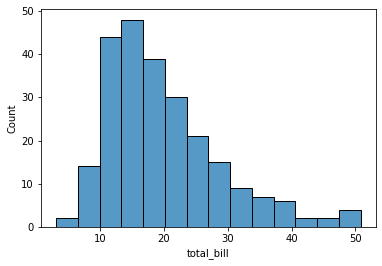

In [238]:
sns.histplot(data=m,x='total_bill')

__from the above graph we can intuit that majority of the total_bill are in between 10-20. The least lies in around 0-5 & 40-50.__  

<AxesSubplot:xlabel='tip', ylabel='Count'>

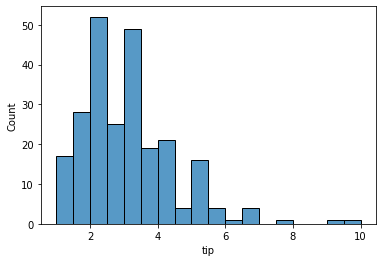

In [239]:
sns.histplot(data=m,x='tip')

__from the above graph we can intuit that majority of the tips given are lies in between 2-4. the least in the 6-10__

<AxesSubplot:xlabel='size', ylabel='Count'>

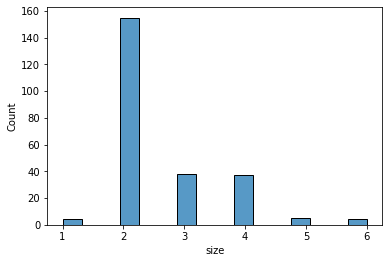

In [240]:
sns.histplot(data=m,x='size')

__from the above graph we can intuit that most of the size is 2 and least is 1,5,6.__

<AxesSubplot:xlabel='sex', ylabel='count'>

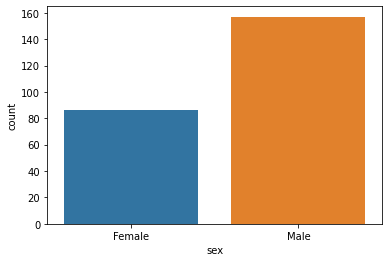

In [241]:
sns.countplot(data=m,x='sex')

__from the above graph we can intuit that majority of the persons are male__

<AxesSubplot:xlabel='smoker', ylabel='count'>

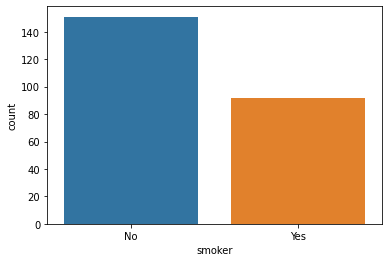

In [242]:
sns.countplot(data=m,x='smoker')

__from the above graph we can intuit that majority are non smokers.__

<AxesSubplot:xlabel='day', ylabel='count'>

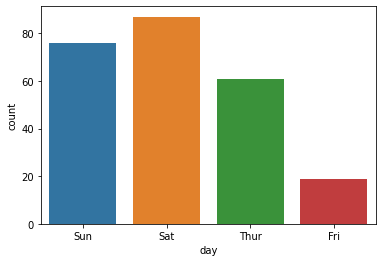

In [243]:
sns.countplot(data=m,x='day')

__from the above graph we can intuit that mostly visited on saturday,sunday.the least on friday__

<AxesSubplot:xlabel='time', ylabel='count'>

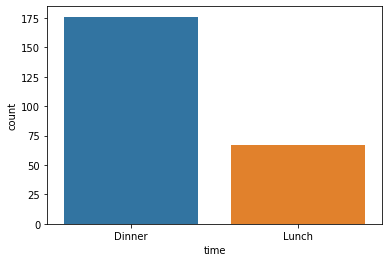

In [244]:
sns.countplot(data=m,x='time')

__from the above graph we can intuit that mostly visited for dinner .__

<AxesSubplot:xlabel='size', ylabel='count'>

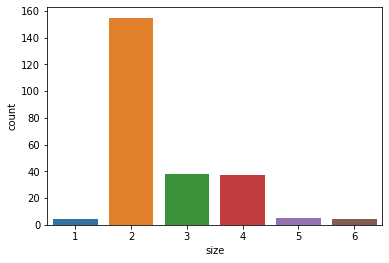

In [245]:
sns.countplot(data=m,x='size')

__from the above graph we can intuit that mostly visited size is 2.__

<AxesSubplot:xlabel='total_bill'>

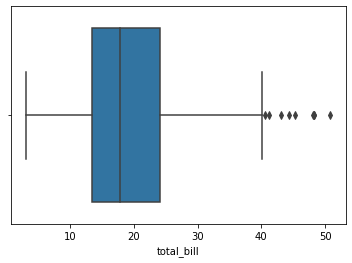

In [246]:
sns.boxplot(data=m,x='total_bill')

__from the above graph we can intuit that most of the total_bill lies in between 10-20.there is no impact of outlier__

<AxesSubplot:xlabel='tip'>

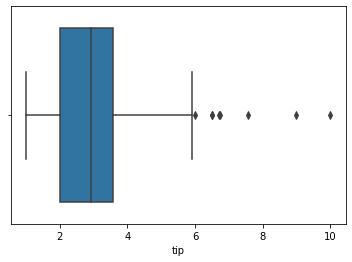

In [247]:
sns.boxplot(data=m,x='tip')

__from the above graph we can intuit that most of the tips given are in between 2-4__

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

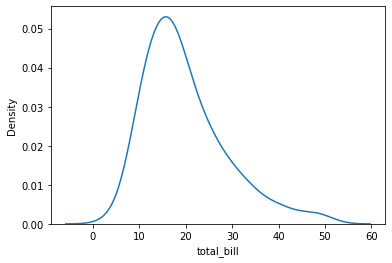

In [248]:
sns.kdeplot(data=m,x='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

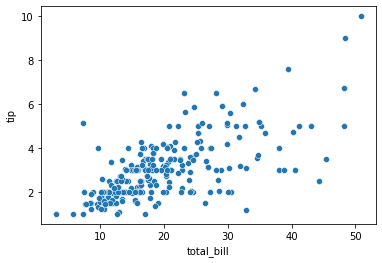

In [249]:
sns.scatterplot(data=m,y='tip',x='total_bill')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

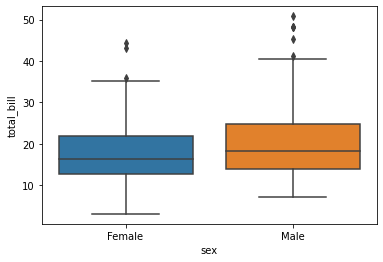

In [250]:
sns.boxplot(data=m,x='sex',y='total_bill')#for numerical vs non-numerical

__from the above graph we can intuit that most of the total_bill is given by males.__

<AxesSubplot:xlabel='sex', ylabel='tip'>

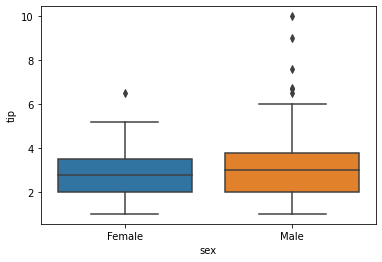

In [251]:
sns.boxplot(data=m,x='sex',y='tip')

__from the above graph we can intuit that most of the tip is given by male.__

<AxesSubplot:xlabel='smoker', ylabel='tip'>

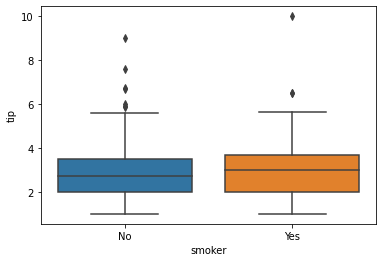

In [252]:
sns.boxplot(data=m,x='smoker',y='tip')

__from the above graph we can intuit that most of the tip is given by smokers.__

<AxesSubplot:xlabel='day', ylabel='tip'>

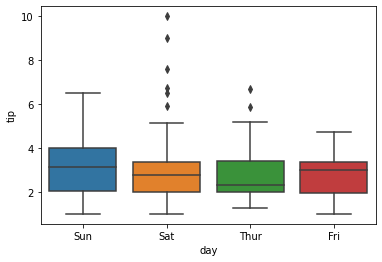

In [253]:
sns.boxplot(data=m,x='day',y='tip')

__from the above graph we can intuit that most of the tip is given on sunday.__

<AxesSubplot:xlabel='time', ylabel='tip'>

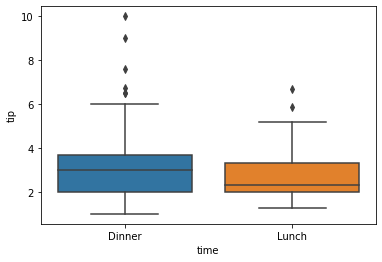

In [254]:
sns.boxplot(data=m,x='time',y='tip')

__from the above graph we can intuit that most of the tip is given on dinners.__

In [255]:
m.dtypes #will give the datatypes of the columns 

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [256]:
non_num_col=m.select_dtypes('object')#gives only non-numerical data
non_num_col

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


__only non-numerical data__

In [257]:
num_col=m.select_dtypes('number')#gives only numerical data
num_col

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


__only numerical data__

In [258]:
encoded_col=pd.get_dummies(non_num_col)
encoded_col

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,0,1,1,0,0,1,0,0,1,0
240,1,0,0,1,0,1,0,0,1,0
241,0,1,0,1,0,1,0,0,1,0
242,0,1,1,0,0,1,0,0,1,0


__encoded non-numerical data__

In [259]:
m_new=pd.concat([num_col,encoded_col],axis=1)
m_new

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


__this is cleansed and encoded data for model analysis__

In [260]:
y=m_new['tip'] 
x=m_new.drop(columns="tip")

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

__""train data""__

In [271]:
x_train#train data

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
43,9.68,2,0,1,1,0,0,0,1,0,1,0
136,10.33,2,1,0,1,0,0,0,0,1,0,1
47,32.40,4,0,1,1,0,0,0,1,0,1,0
129,22.82,3,0,1,1,0,0,0,0,1,0,1
148,9.78,2,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
128,11.38,2,1,0,1,0,0,0,0,1,0,1
119,24.08,4,1,0,1,0,0,0,0,1,0,1
133,12.26,2,1,0,1,0,0,0,0,1,0,1
140,17.47,2,1,0,1,0,0,0,0,1,0,1


In [272]:
y_train

43     1.32
136    2.00
47     6.00
129    2.18
148    1.73
       ... 
128    2.00
119    2.92
133    2.00
140    3.50
200    4.00
Name: tip, Length: 170, dtype: float64

__""test data""__

In [273]:
x_test#test data

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
127,14.52,2,1,0,1,0,0,0,0,1,0,1
231,15.69,3,0,1,0,1,0,1,0,0,1,0
163,13.81,2,0,1,1,0,0,0,1,0,1,0
93,16.32,2,1,0,0,1,1,0,0,0,1,0
183,23.17,4,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
228,13.28,2,0,1,1,0,0,1,0,0,1,0
174,16.82,2,0,1,0,1,0,0,1,0,1,0
186,20.90,3,1,0,0,1,0,0,1,0,1,0
124,12.48,2,1,0,1,0,0,0,0,1,0,1


In [274]:
y_test

127    2.00
231    3.00
163    2.00
93     4.30
183    6.50
       ... 
228    2.72
174    4.00
186    3.50
124    2.52
189    4.00
Name: tip, Length: 73, dtype: float64

In [275]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [276]:
x_train_con=sm.add_constant(x_train)#adding constant to get the intercept
lr_ols=sm.OLS(y_train,x_train_con).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           6.53e-21
Time:                        22:19:49   Log-Likelihood:                -236.80
No. Observations:                 170   AIC:                             491.6
Df Residuals:                     161   BIC:                             519.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2707      0.087      3.108      0.002       0.099       0.443
total_bill      0.0944      0.011      8.818      0.000       0.073       0.116
size            0.1850      0.100      1.849      0.066      -0.013       0.382
sex_Female      0.1464      0.091      1.612      0.109      -0.033       0.326
sex_Male        0.1243      0.093      1.338      0.183      -0.059       0.308
smoker_No       0.1638      0.101      1.621      0.107      -0.036       0.363
smoker_Yes      0.1069      0.097      1.103      0.271      -0.084       0.298
day_Fri         0.0912      0.241      0.378      0.706      -0.385       0.567
day_Sat         0.1526      0.254      0.601      0.549      -0.349       0.654
day_Sun         0.2129      0.259      0.824      0.411      -0.298       0.723
day_Thur       -0.1860      0.409     -0.455      0.650      -0.994       0.622
time_Dinner    -0.0675      0.292     -0.231      0.817      -0.644       0.509
time_Lunch      0.3382      0.315      1.072      0.285      -0.285       0.961
==============================================================================
Omnibus:                       25.130   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.605
Skew:                           0.681   Prob(JB):                     1.03e-11
Kurtosis:                       5.300   Cond. No.                     5.91e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.46e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [277]:
x_test_con=sm.add_constant(x_test)
y_predicted=lr_ols.predict(x_test_con)
y_predicted

127    2.473692
231    2.622945
163    2.377702
93     2.458163
183    3.574304
         ...   
228    2.267398
174    2.604937
186    3.197205
124    2.281110
189    3.382742
Length: 73, dtype: float64

In [278]:
mean_squared_error(y_pred,y_test)**0.5

1.0853885965795393

__Root mean square error__

__-----------------------------------------------------------------------------------------CONCLUSION-------------------------------------------------------------------------------------------------__

__The linear regression model we developed by taking 70% of the data as training data,gives us the RMSE value approximately  " 1 ".Based on a rule of thumb, it can be said that RMSE values lies in between 0.2 and 0.5 shows that the model can predict the data accurately.And the adjusted R^2 values is 0.476.If we increase the train data to another 10% we can get increased accuracy model compared to the present model.__